# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Import Dataset

In [3]:
df = pd.read_csv("data_praktikum.csv")
df.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

IDPelanggan                   0
Kelamin                       0
Usia                          0
Pendapatan (juta Rp)          0
Rating_pengeluaran (1-100)    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IDPelanggan,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Usia,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Pendapatan (juta Rp),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Rating_pengeluaran (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.describe(include=['object'])

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


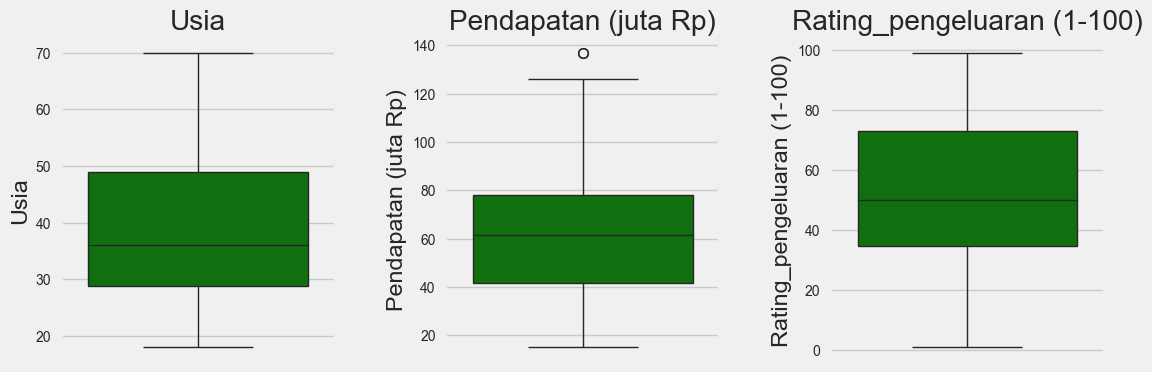

In [8]:
def box_plot(df):
    variabel = ['Usia', 'Pendapatan (juta Rp)', 'Rating_pengeluaran (1-100)']
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, var in enumerate(variabel):
        sns.boxplot(y=var, data=df, color='green', ax=axes[i])  # Pastikan 'data' dipakai bukan 'df'
        axes[i].set_title(var)
        
    plt.show()
    
box_plot(df)

# Pre-processing

In [9]:
df.drop(['IDPelanggan'], axis=1, inplace=True)
df.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,Laki,19,15,39
1,Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40


In [10]:
le = LabelEncoder()
df['Kelamin'] = le.fit_transform(df['Kelamin'])
df.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [11]:
scaler = MinMaxScaler()

# Fit transform
X_scaled = scaler.fit_transform(df)
X_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

# Modelling

## KMeans

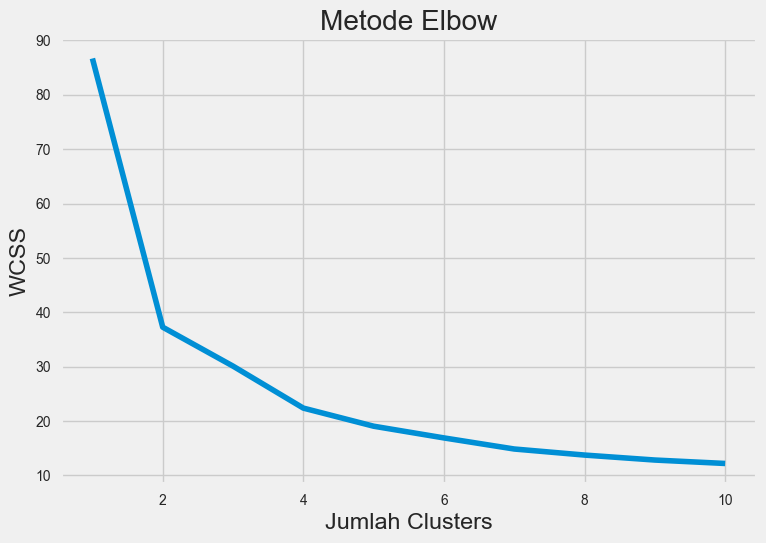

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
model1 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred1 = model1.fit_predict(X_scaled)

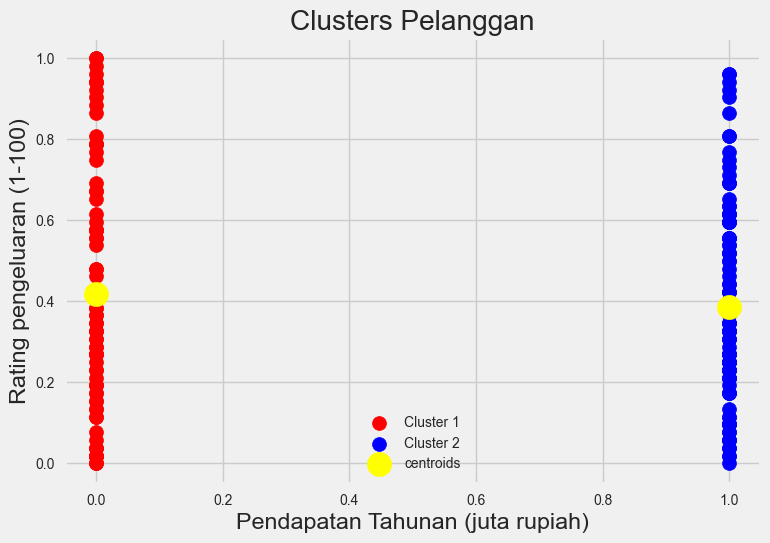

In [14]:
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
           s = 100, c = 'red', label='Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
           s = 100, c = 'blue', label='Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
           s = 300, c = 'yellow', label = 'centroids')

plt.title("Clusters Pelanggan")
plt.xlabel("Pendapatan Tahunan (juta rupiah)")
plt.ylabel("Rating pengeluaran (1-100)")
plt.legend()
plt.show()

## DBSCAN

In [15]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1, min_samples=5)

# Melakukan Clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [16]:
# Tambahkan label tersebut menjadi kolom baru di dataset
df['hasil_cluster'] = model2.labels_
df.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),hasil_cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


<Axes: xlabel='Pendapatan (juta Rp)', ylabel='Rating_pengeluaran (1-100)'>

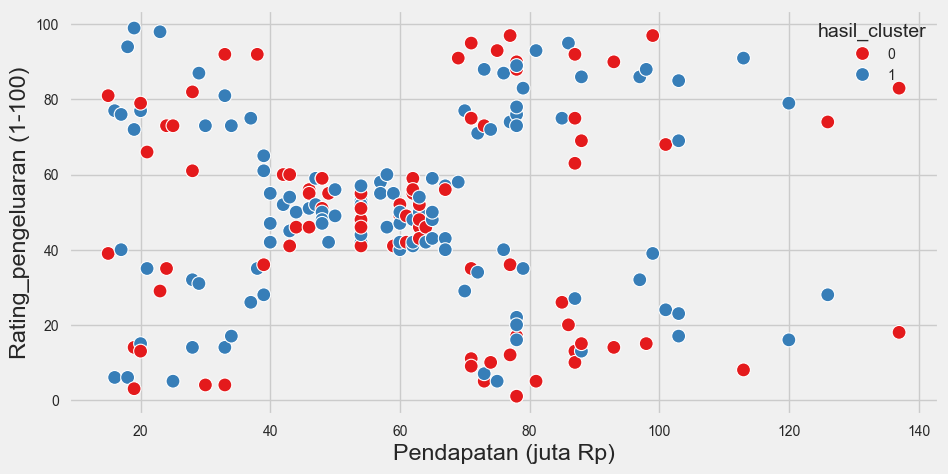

In [17]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x = 'Pendapatan (juta Rp)', y = 'Rating_pengeluaran (1-100)',
                hue = 'hasil_cluster', data = df, palette = "Set1", s=100)

# Metrics Evaluation

## Silhoutte Score

In [18]:
# Menghitung silhoutte score algoritma KMeans
evaluasi_kmeans = silhouette_score(X_scaled, y_pred1)
print("Silhoutte Score:", evaluasi_kmeans)

Silhoutte Score: 0.5194624832665107


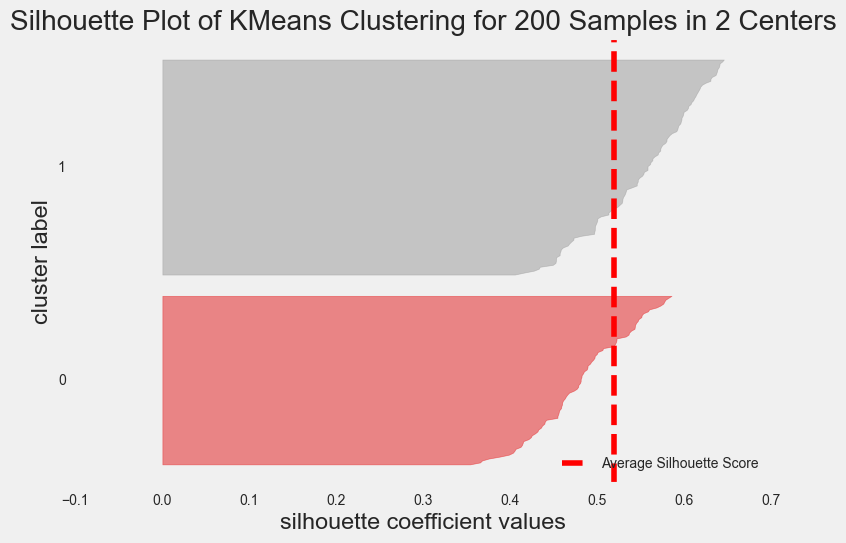

In [19]:
# Membuat silhoutte visualization untuk algoritma KMeans
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [20]:
# Menghitung silhoutte score algoritma DBSCAN
evaluasi_dbscan = silhouette_score(X_scaled, y_pred2)
print("Silhoutte Score:", evaluasi_dbscan)

Silhoutte Score: 0.5194624832665107


## Davies-Bouldin Index (DBI)

In [21]:
# Menghitung DBI score algoritma KMeans
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.8172534497318451


In [22]:
# Menghitung DBI score algoritma DBSCAN
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 0.8172534497318451
